##### Experiment 1

Model Size: 850MB

Original Repo： Hugging Face.

Framework: Tensorflow.

NLP Task: Text Classification

Host Config:

```
runtime: python38
service: t5-base-lu

instance_class: F4_1G

automatic_scaling:
  target_cpu_utilization: 0.65
  max_instances: 1

entrypoint: gunicorn -b :$PORT -w 8 main:app --timeout 1200
```

In [1]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }
import subprocess
import json
import requests

In [3]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)


<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>



In [5]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(10):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/10)

Epoch:  0

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:24.333758
Epoch:  1

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an error and could not complete your request.<p>Please try again in 30 seconds.</h2>
<h2></h2>
</body></html>

the time for making the API call is  0:00:26.019478
Epoch:  2

<html><head>
<meta http-equiv="content-type" content="text/html;charset=utf-8">
<title>500 Server Error</title>
</head>
<body text=#000000 bgcolor=#ffffff>
<h1>Error: Server Error</h1>
<h2>The server encountered an er

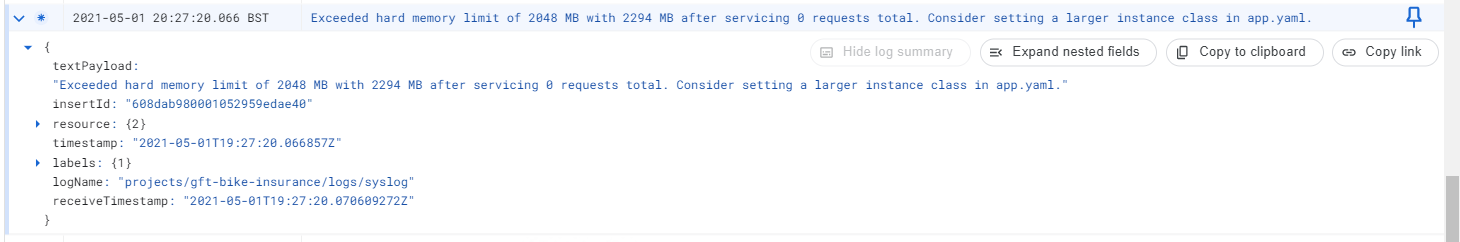

In [6]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:01.461939
0:00:21.973932
0:00:26.019478


### Experiment 2

1 instance

Host Config:

```
runtime: python
env: flex
entrypoint: gunicorn -b :$PORT -w 8 main:app --timeout 300
service: t5-base
-lu

runtime_config:
  python_version: 3

manual_scaling:
  instances: 1
resources:
  cpu: 1
  memory_gb: 4
  disk_size_gb: 20

liveness_check:
  initial_delay_sec: 300
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 4
  success_threshold: 2
readiness_check:
  check_interval_sec: 300
  timeout_sec: 4
  failure_threshold: 2
  success_threshold: 2
  app_start_timeout_sec: 1800
```

In [2]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [3]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [4]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(10):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(10)
    
print("the average time for making an API call is ", tot_pred_time/10)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:40.006671
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:36.961819
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:38.928079
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:36.073723
Epoch:  4
{ output:<pad> the US has over 637

In [6]:
# Latency
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:35.390956
0:00:36.898340
0:00:40.006671


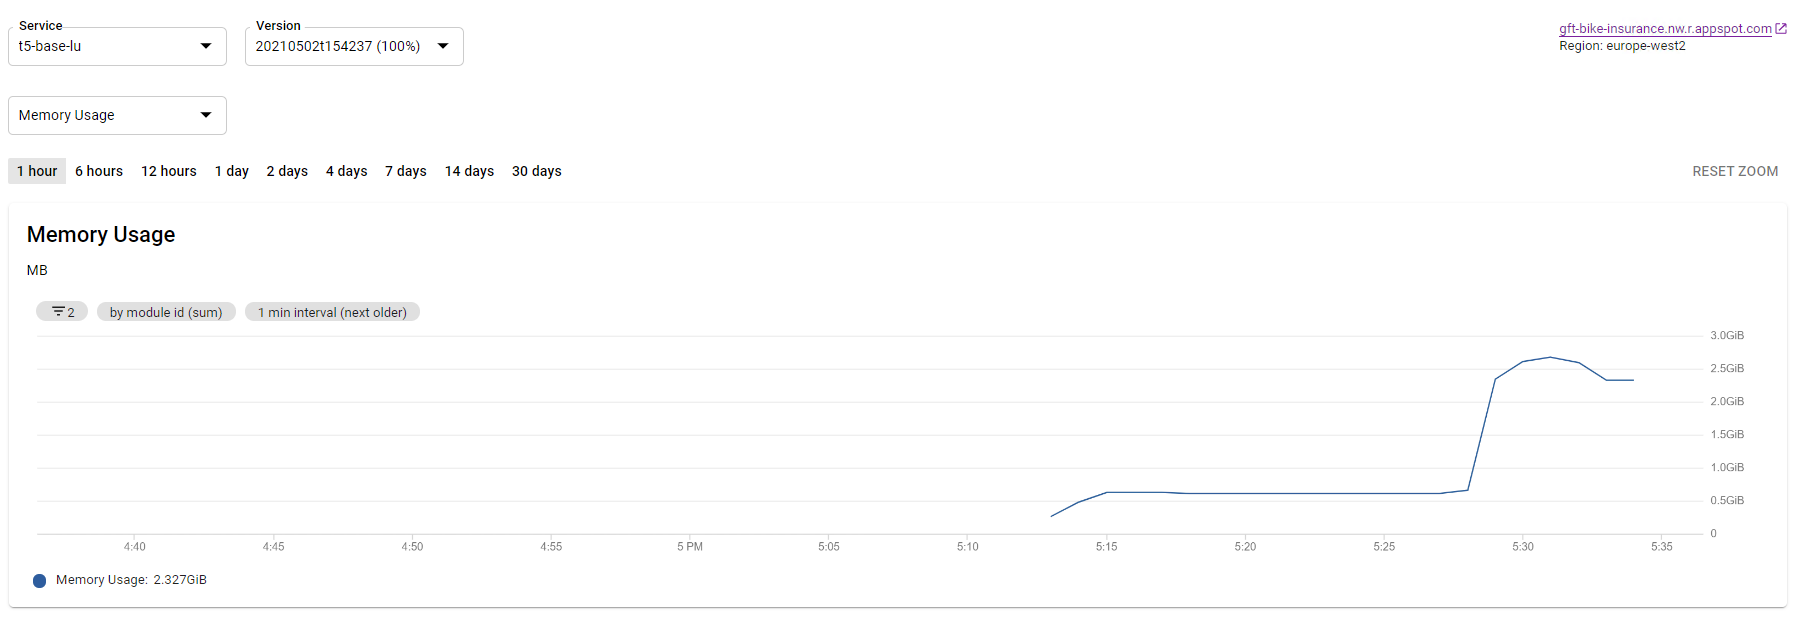

### Experiment 3

1 instance

Host Config:

```
....

runtime_config:
  python_version: 3

manual_scaling:
  instances: 1
resources:
  cpu: 1
  memory_gb: 6
  disk_size_gb: 20

....
```

In [7]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [8]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [9]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(10):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(10)
    
print("the average time for making an API call is ", tot_pred_time/10)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:41.543045
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:38.890034
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:39.310139
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:38.889181
Epoch:  4
{ output:<pad> the US has over 637

In [10]:
# Latency
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:38.274563
0:00:39.235919
0:00:41.543045


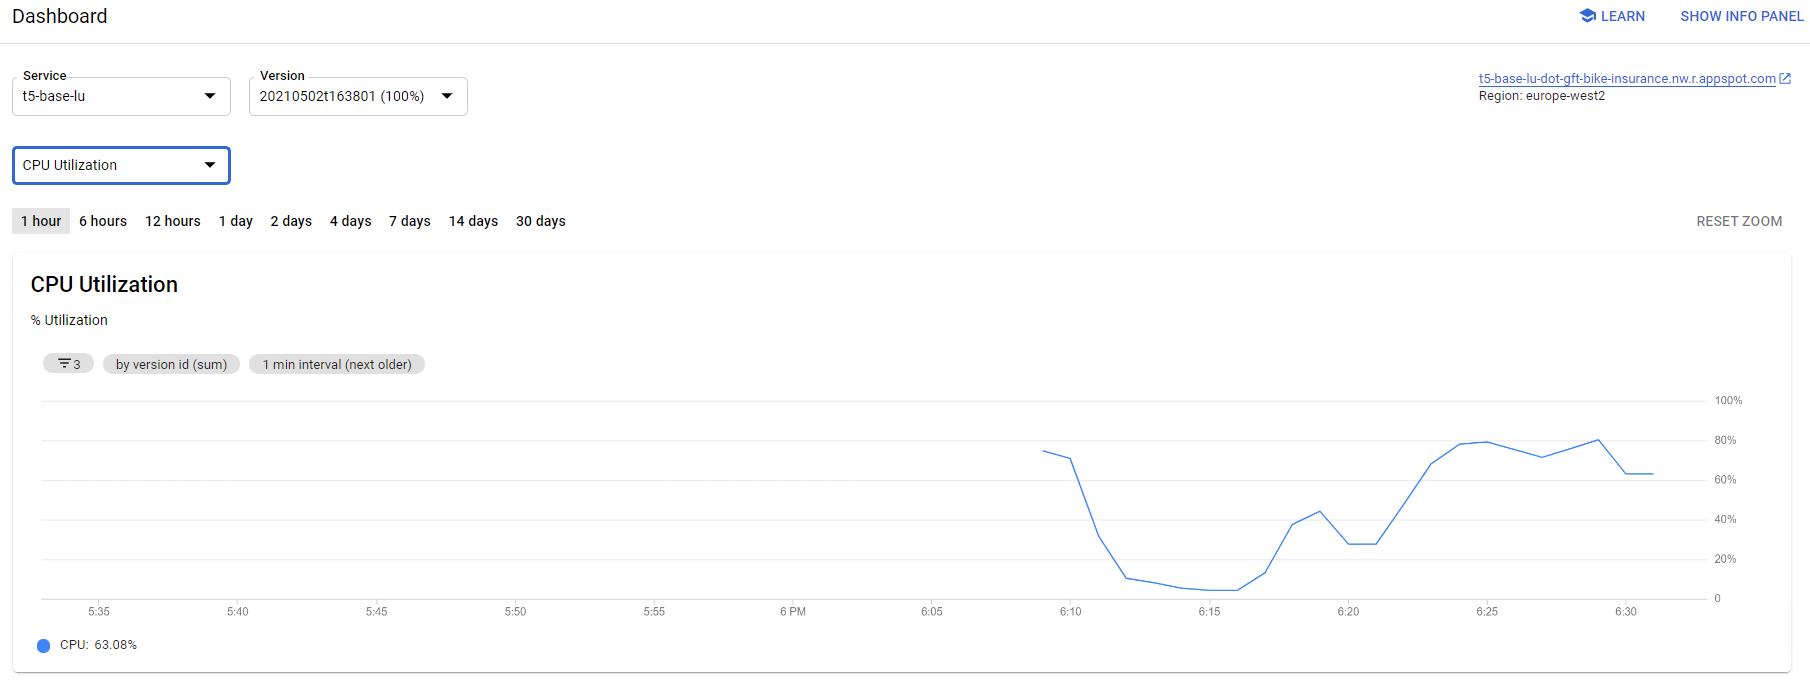

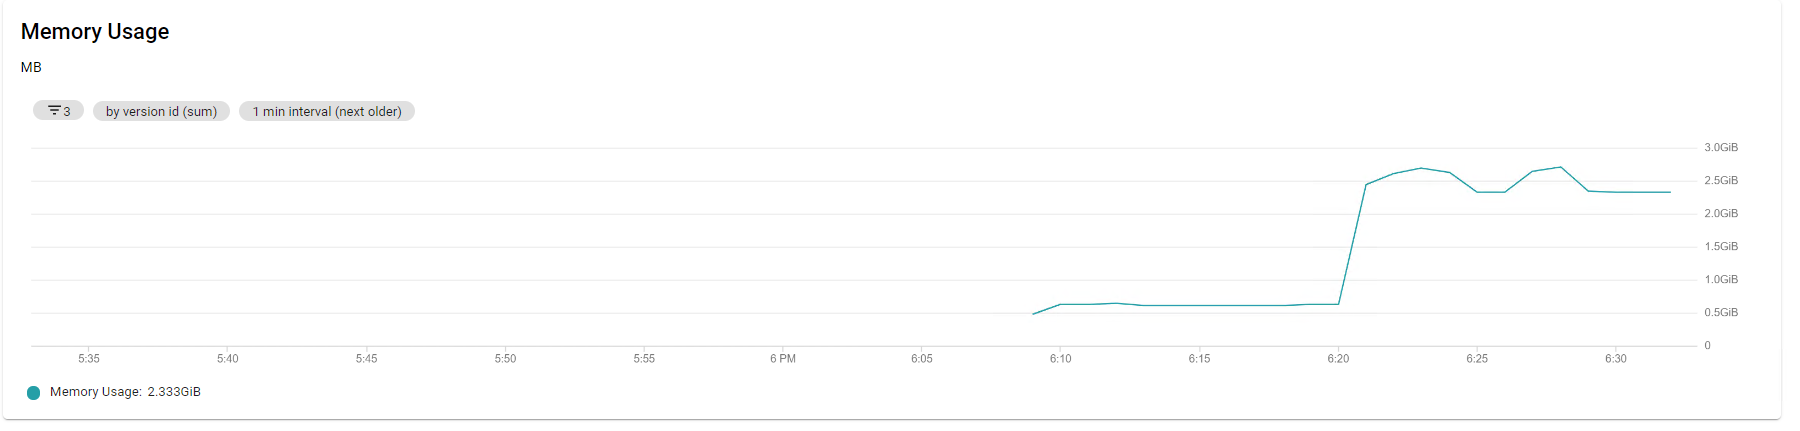

In [12]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_base, 
                                 headers=headers, 
                                 json=data_t5_base)
        print(response.text)
        num += 1
    return num

In [13]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 1; tot number of requests processed in 20s are 1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 2; tot number of requests processed in 20s are 2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new g

### Experiment 4

1 instance

Host Config:

```
...
entrypoint: gunicorn -b :$PORT -w 8 main:app --timeout 1200
...

manual_scaling:
  instances: 1
resources:
  cpu: 1
  memory_gb: 2
  disk_size_gb: 20

...
```

In [35]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [ ]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)



```
2021-05-02 13:58:12 t5-base-lu[20210502t131551]  To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-05-02 13:58:12 t5-base-lu[20210502t131551]  2021-05-02 13:58:12.835088: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-02 13:58:13 t5-base-lu[20210502t131551]  2021-05-02 13:58:13.309601: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2021-05-02 13:58:14 t5-base-lu[20210502t131551]  2021-05-02 13:58:14.473217: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 98697216 exceeds 10% of free system memory.
2021-05-02 13:58:15 t5-base-lu[20210502t131551]  2021-05-02 13:58:15.643599: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 98697216 exceeds 10% of free system memory.
2021-05-02 13:58:15 t5-base-lu[20210502t131551]  2021-05-02 13:58:15.785354: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 98697216 exceeds 10% of free system memory.
```

We saw gunicorn time out:

```
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [1] [CRITICAL] WORKER TIMEOUT (pid:27)
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [1] [INFO] Starting gunicorn 20.0.4
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [8] [INFO] Booting worker with pid: 8
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [10] [INFO] Booting worker with pid: 10
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [11] [INFO] Booting worker with pid: 11
2021-05-02 14:19:59 t5-base-lu[20210502t131551]  [2021-05-02 14:19:59 +0000] [15] [INFO] Booting worker with pid: 15

```

### Experiment 5

1 instances two core

Host Config:

```
...

manual_scaling:
  instances: 1
resources:
  cpu: 2
  memory_gb: 4
  disk_size_gb: 20

....
```

In [15]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [16]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [17]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:37.785975
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:32.566771
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:34.749009
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:30.396800
Epoch:  4
{ output:<pad> the US has over 637

In [18]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:29.203964
0:00:31.194608
0:00:37.785975


In [19]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_base, 
                                 headers=headers, 
                                 json=data_t5_base)
        print(response.text)
        num += 1
    return num

In [20]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 1; tot number of requests processed in 20s are 1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 2; tot number of requests processed in 20s are 2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new g

### Experiment 6

1 instances four core

Host Config:

```
...

manual_scaling:
  instances: 1
resources:
  cpu: 4
  memory_gb: 8
  disk_size_gb: 20

....
```

In [23]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [21]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [22]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:19.408767
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:19.441341
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:19.367734
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:18.957088
Epoch:  4
{ output:<pad> the US has over 637

In [23]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:18.921166
0:00:19.968720
0:00:23.225044


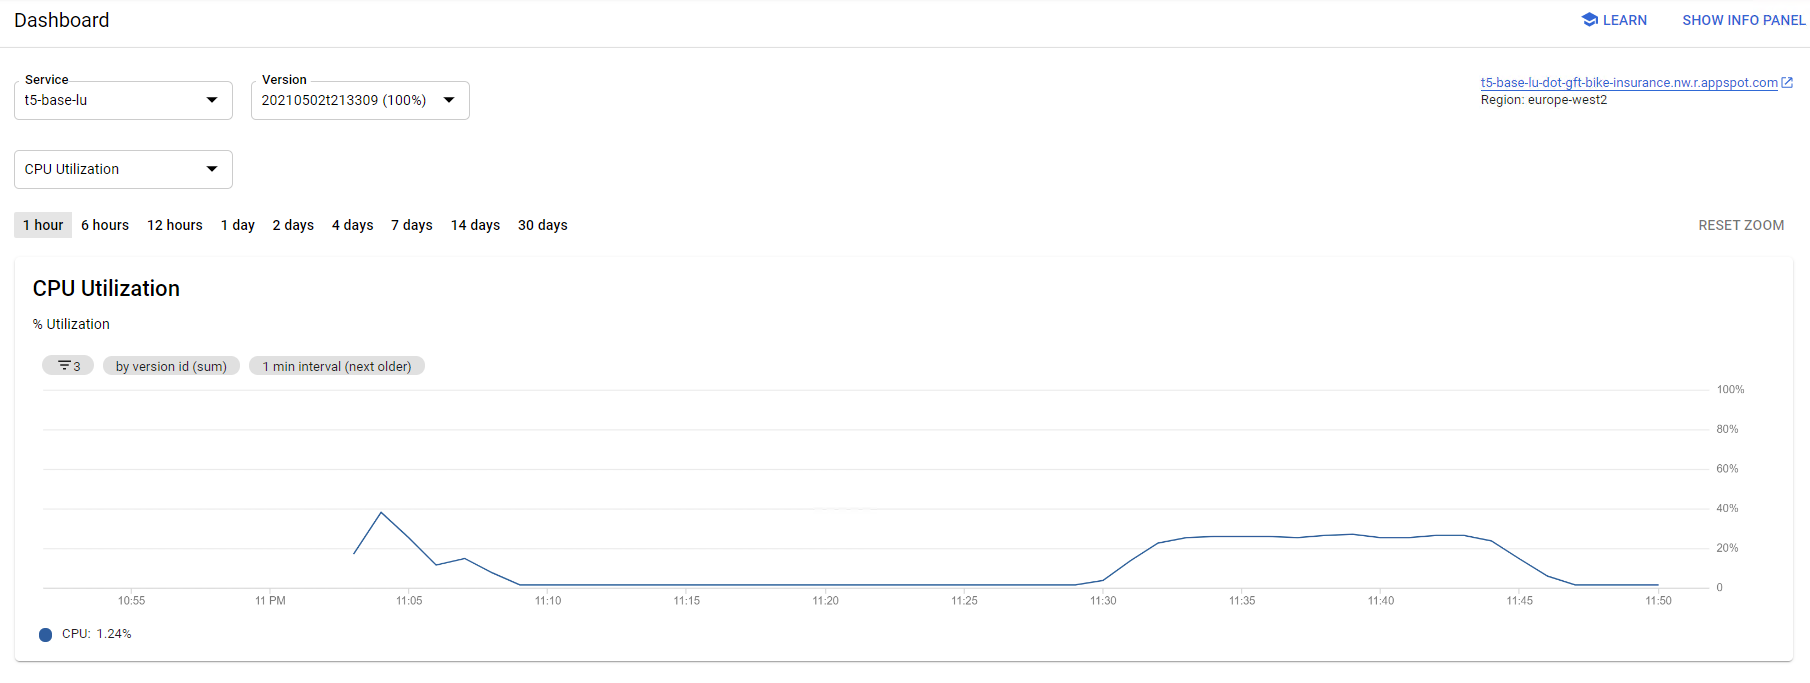

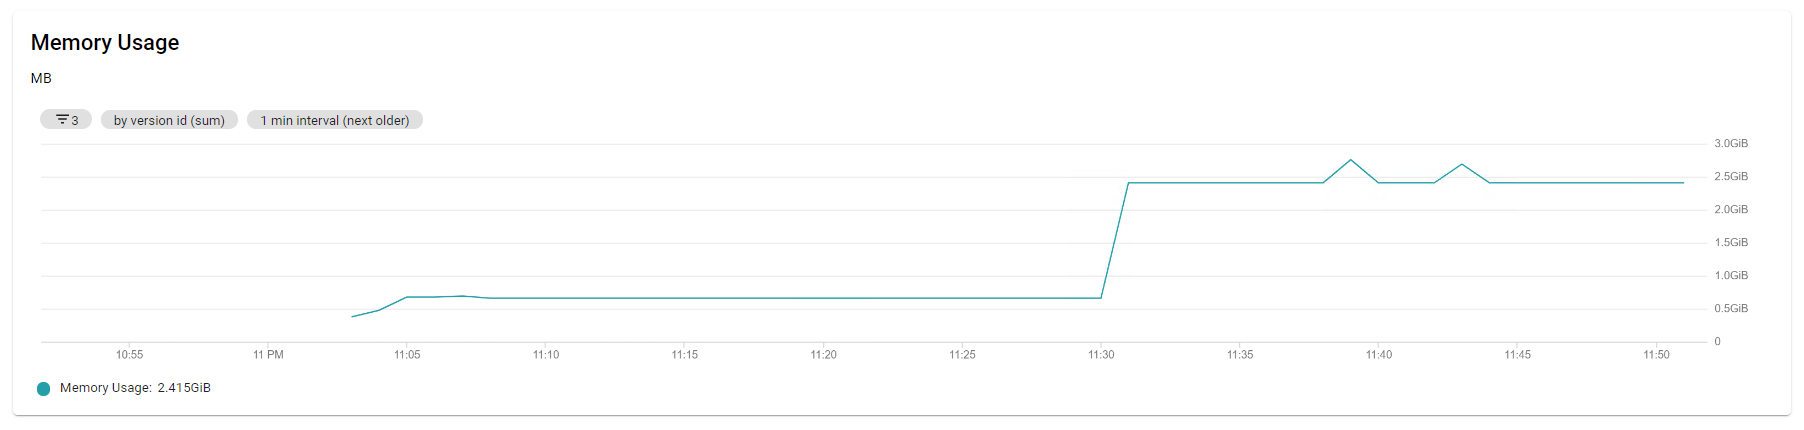

In [24]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_base, 
                                 headers=headers, 
                                 json=data_t5_base)
        print(response.text)
        num += 1
    return num

In [25]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 1; tot number of requests processed in 20s are 1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 2; tot number of requests processed in 20s are 3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new g

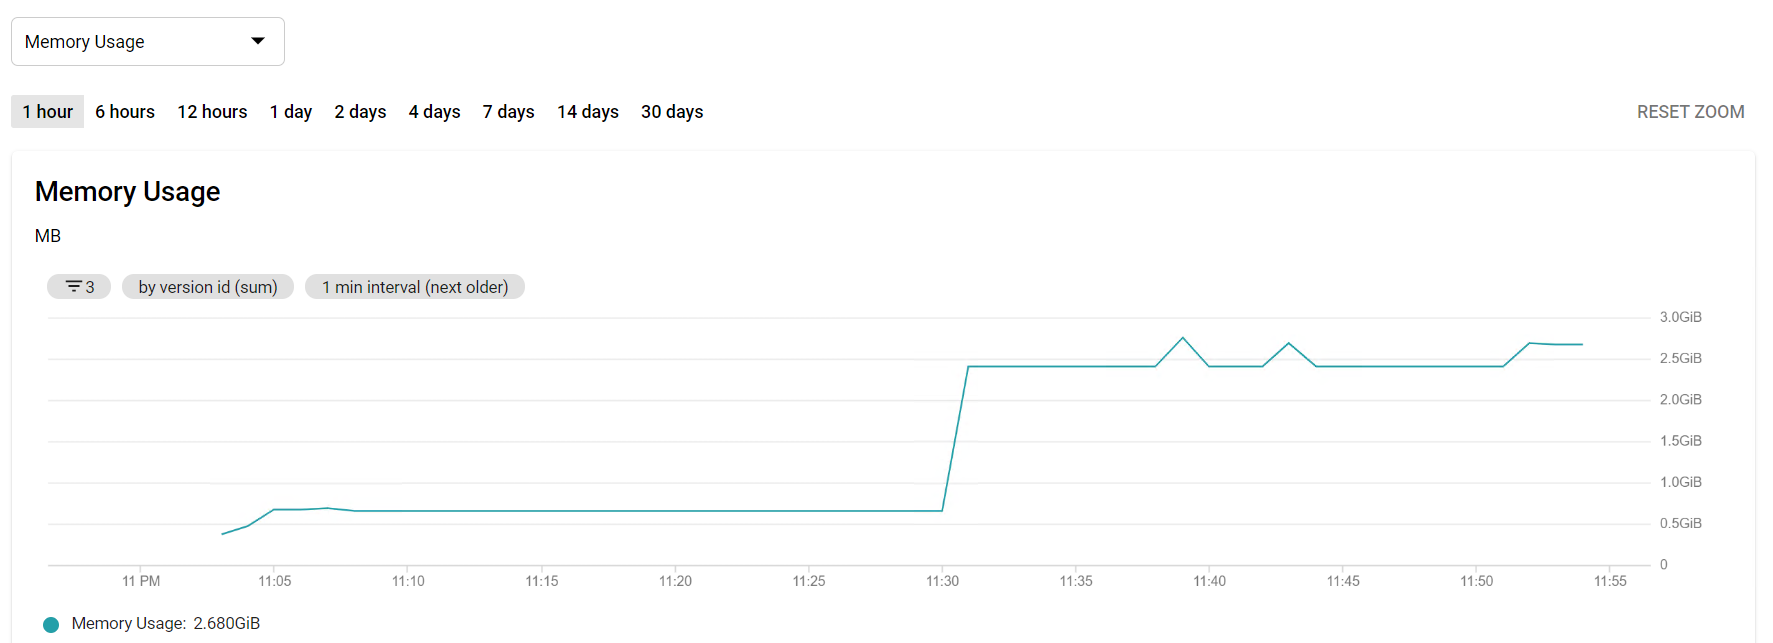

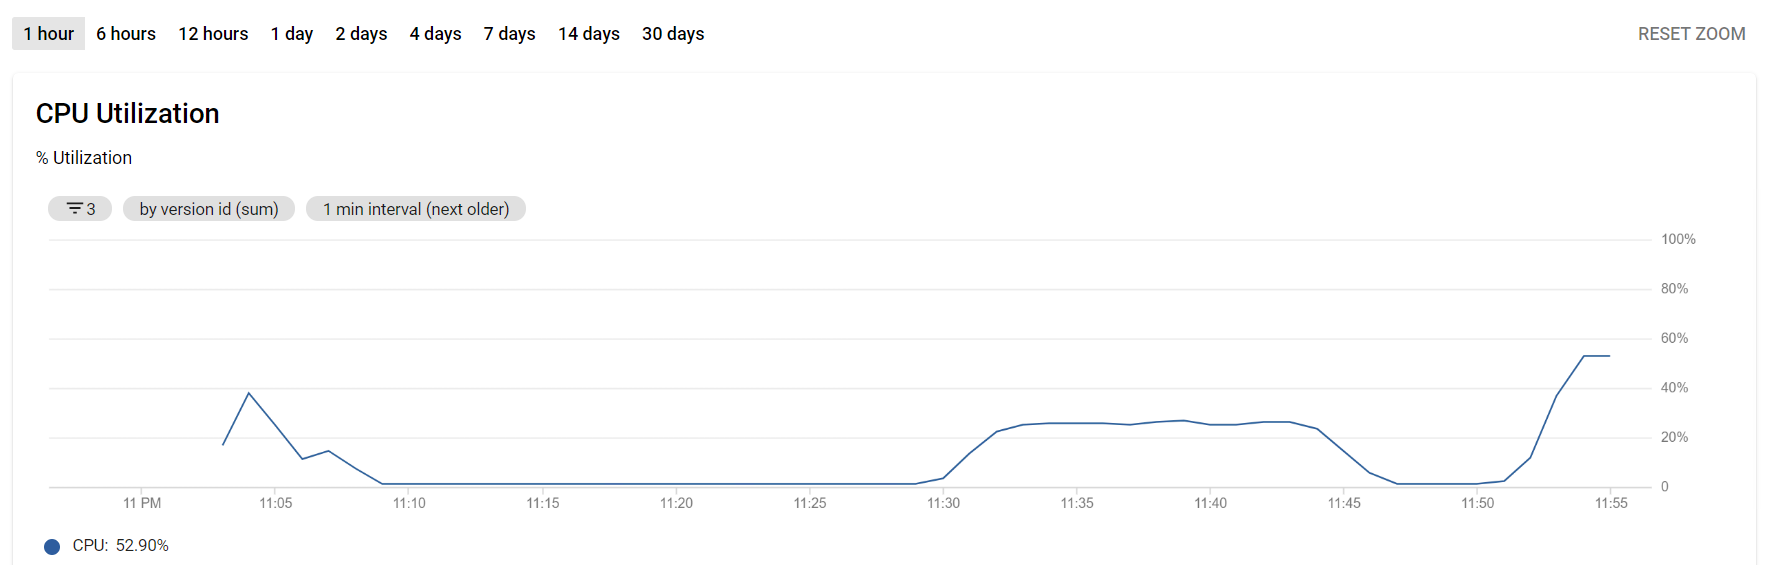

### Experiment 7

1 instances four core

Host Config:

```
...

manual_scaling:
  instances: 1
resources:
  cpu: 8
  memory_gb: 16
  disk_size_gb: 20

....
```

In [26]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [27]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [28]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:18.931275
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:19.103222
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:18.743176
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:19.241734
Epoch:  4
{ output:<pad> the US has over 637

In [29]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:18.425054
0:00:18.912090
0:00:19.786459


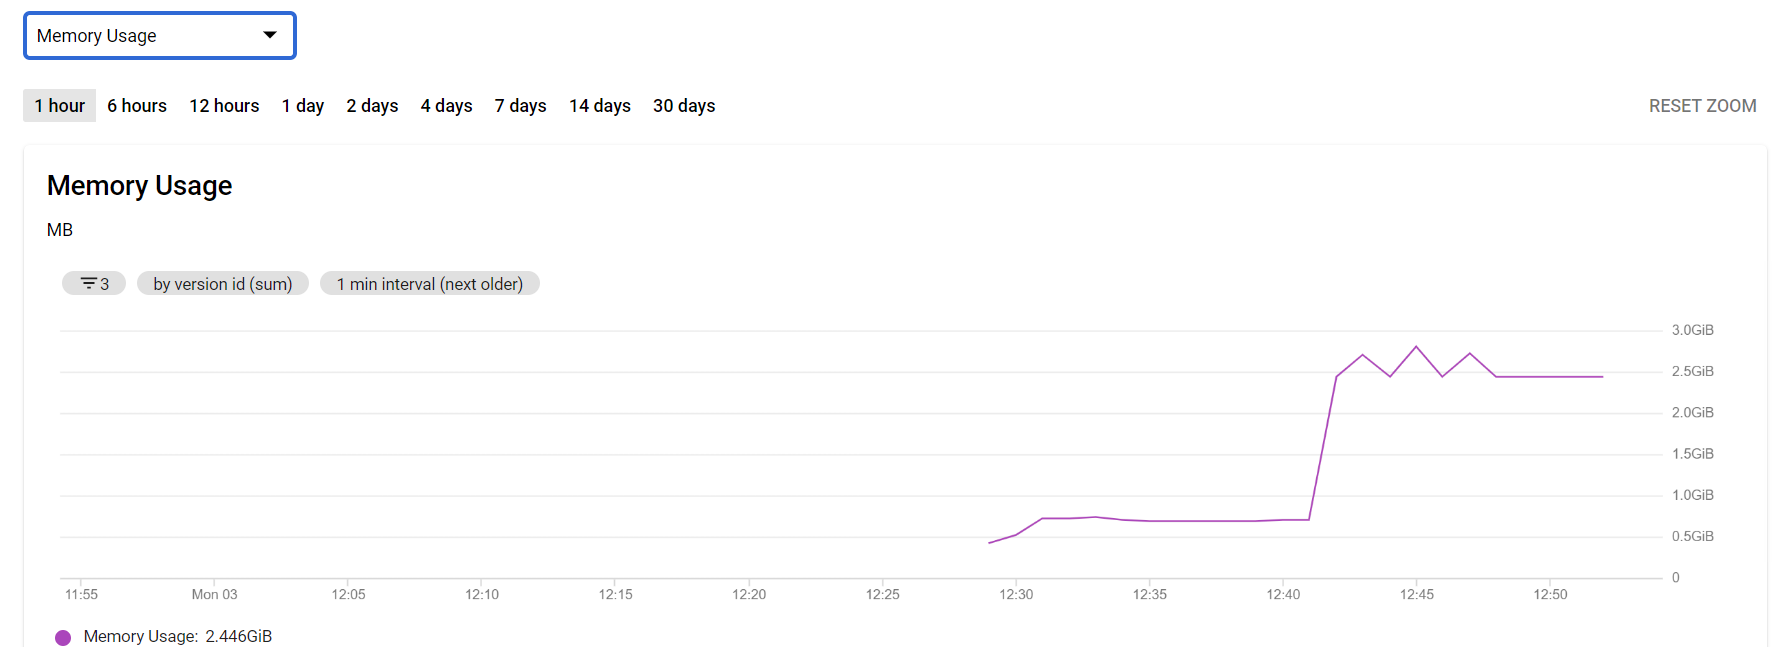

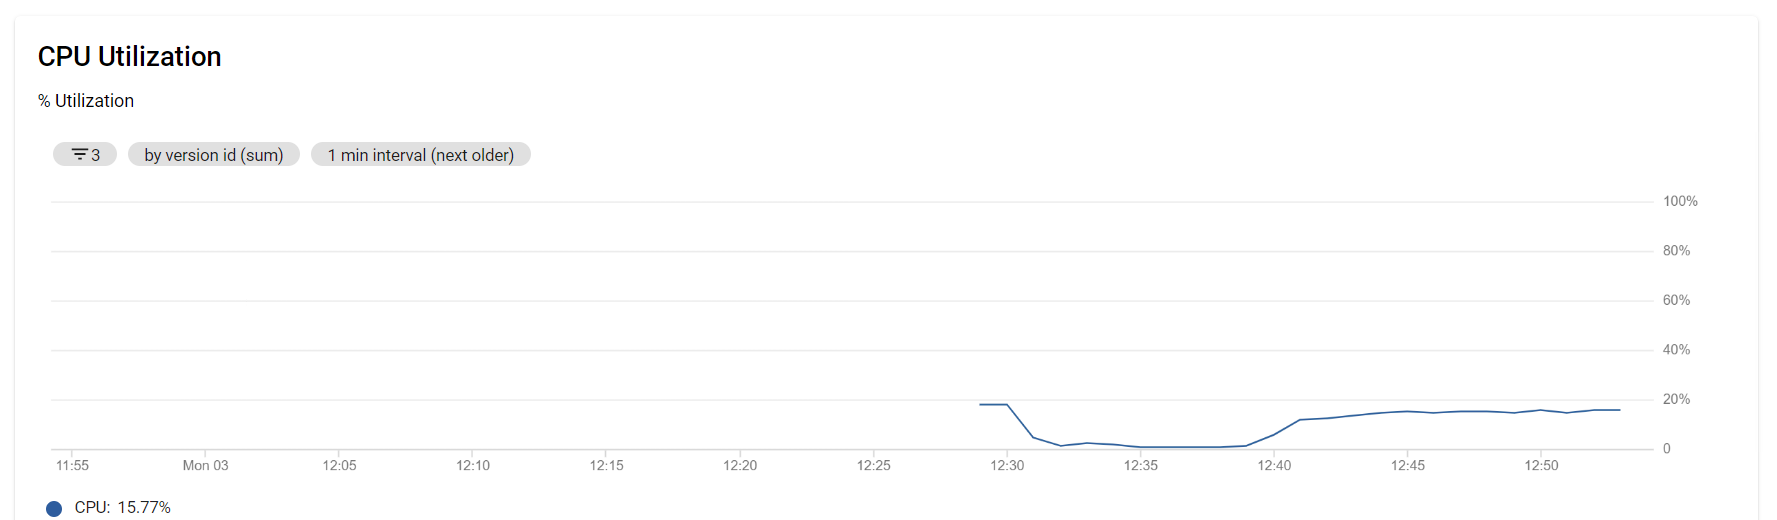

In [30]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_base, 
                                 headers=headers, 
                                 json=data_t5_base)
        print(response.text)
        num += 1
    return num

In [31]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 1; tot number of requests processed in 20s are 2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


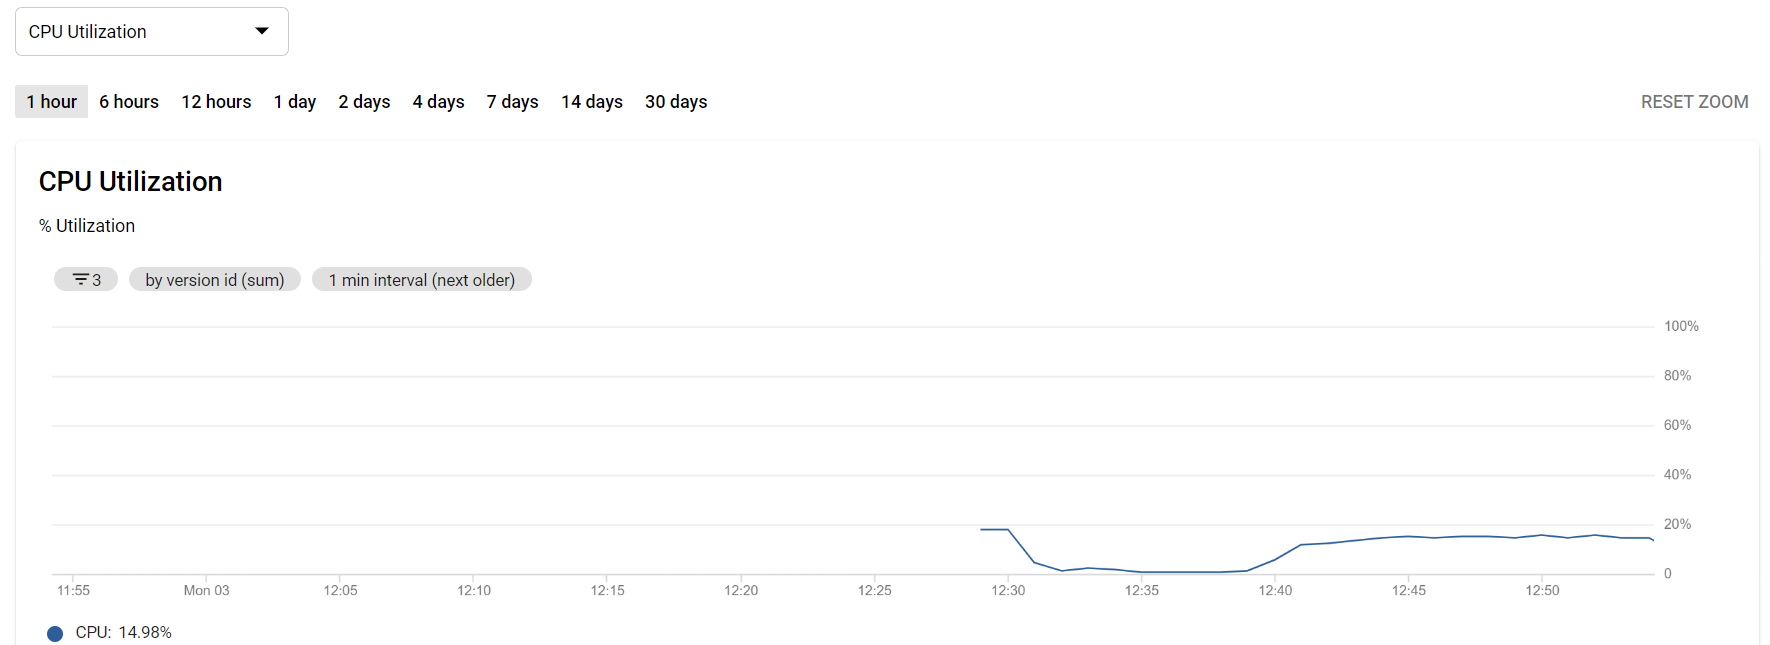

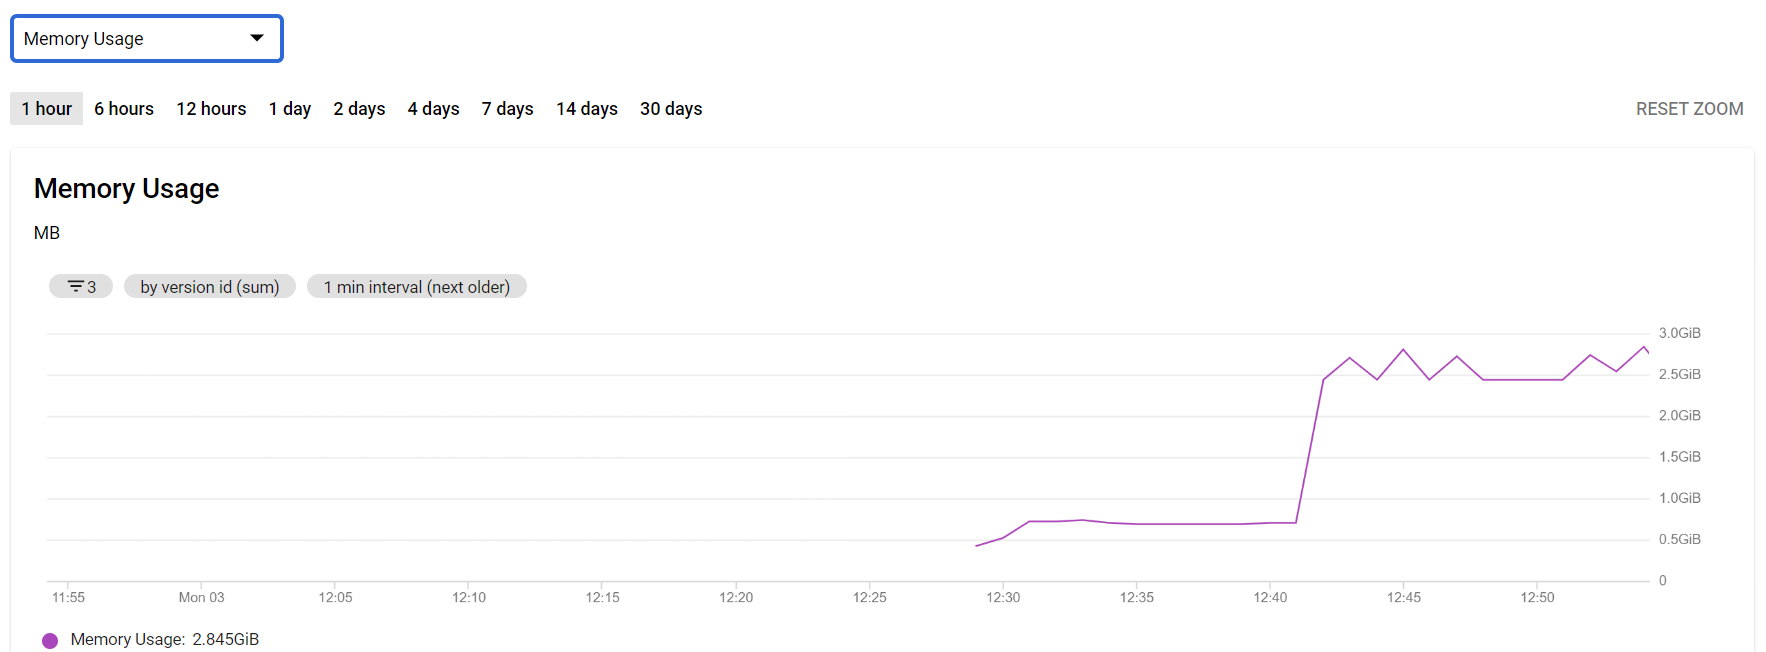

### Experiment 7

3 instances

Host Config:

```
...

manual_scaling:
  instances: 3
resources:
  cpu: 1
  memory_gb: 4
  disk_size_gb: 20

....
```

In [32]:
gae_t5_base = 'https://t5-base-lu-dot-gft-bike-insurance.nw.r.appspot.com/run-zerohot-t5'
sentence = '''
summarize: The US has passed the peak on new coronavirus cases, 
President Donald Trump said and predicted that some states would reopen this month. 
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, 
the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, 
Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. 
We will be the comeback kids, all of us, he said. We want to get our country back. 
The Trump administration has previously fixed May 1 as a possible date to reopen the worlds largest economy, 
but the president said some states may be able to return to normalcy earlier than that.
'''
data_t5_base = {
  "sentence": sentence,
    "model_name": "t5-base"
  }

In [33]:
output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
access_token = "Bearer " + output[:-1]
headers = {'Authorization': access_token}
response = requests.post(gae_t5_base, 
                         headers=headers, 
                         json=data_t5_base)
print(response.text)

{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}


In [35]:
import datetime
import time

tot_pred_time = datetime.timedelta(0)
execution_time = []

for i in range(20):
    print('Epoch: ', i)
    time_start = datetime.datetime.now()
    output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
    access_token = "Bearer " + output[:-1]
    headers = {'Authorization': access_token}
    response = requests.post(gae_t5_base, 
                             headers=headers, 
                             json=data_t5_base)
    print(response.text)
    time_end = datetime.datetime.now()
    time_diff = time_end - time_start
    print("the time for making the API call is ", time_diff)
    tot_pred_time += time_diff
    execution_time.append(time_diff)
    time.sleep(20)
    
print("the average time for making an API call is ", tot_pred_time/20)

Epoch:  0
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:40.534685
Epoch:  1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:42.570131
Epoch:  2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:35.944851
Epoch:  3
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
the time for making the API call is  0:00:38.983253
Epoch:  4
{ output:<pad> the US has over 637

In [36]:
import numpy as np
print(np.min(execution_time))
print(np.mean(execution_time))
print(np.max(execution_time))

0:00:32.645866
0:00:37.209042
0:00:42.570131


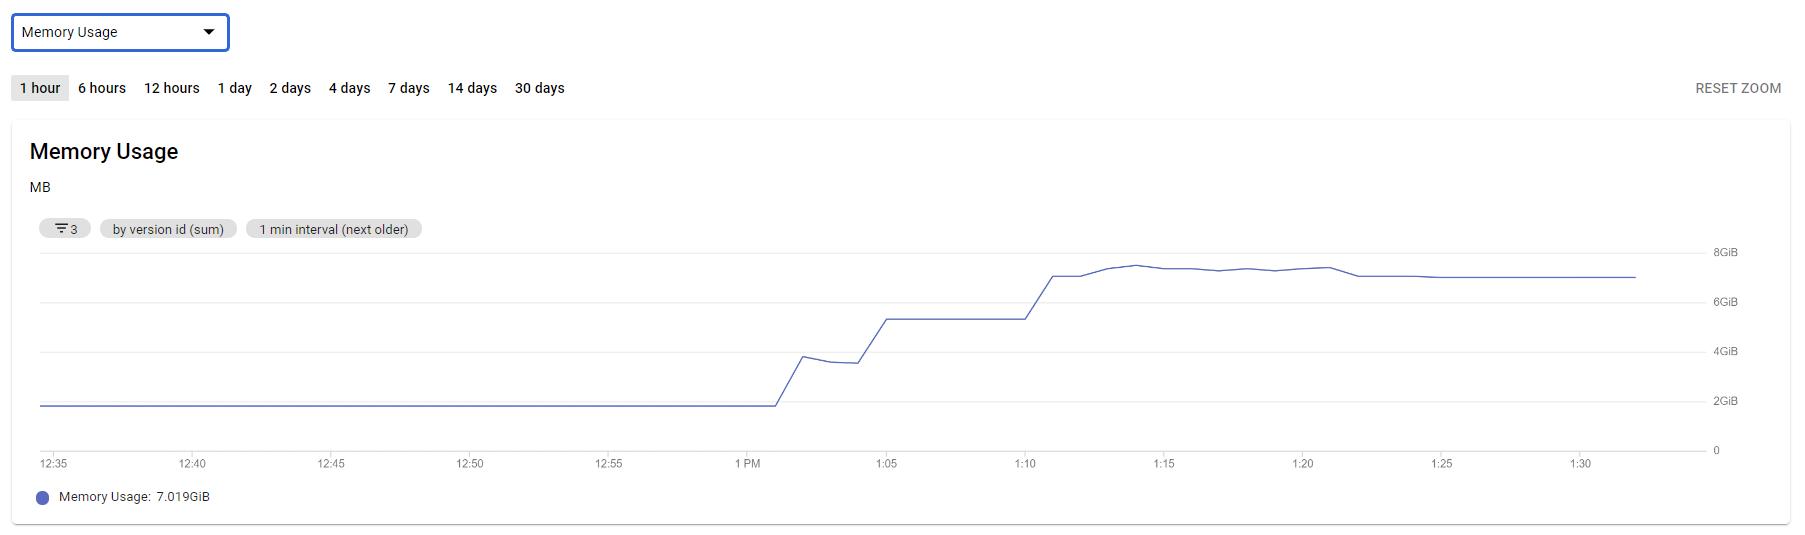

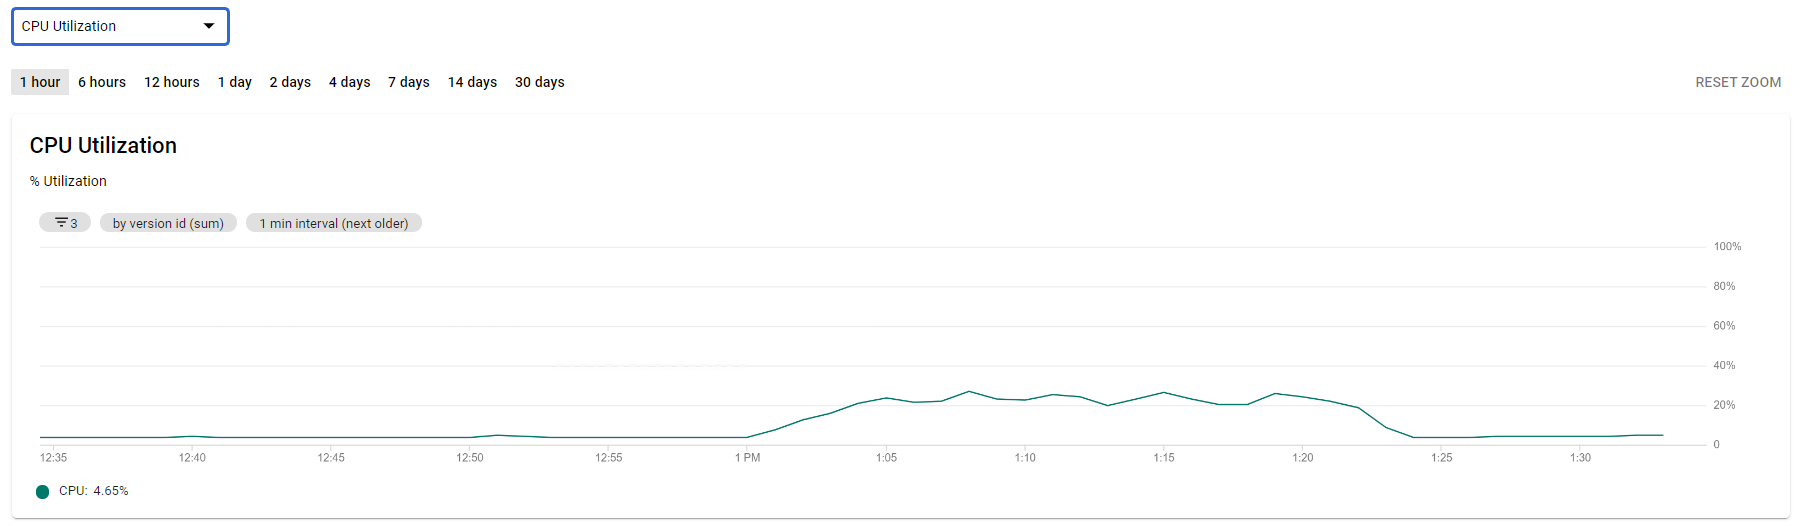

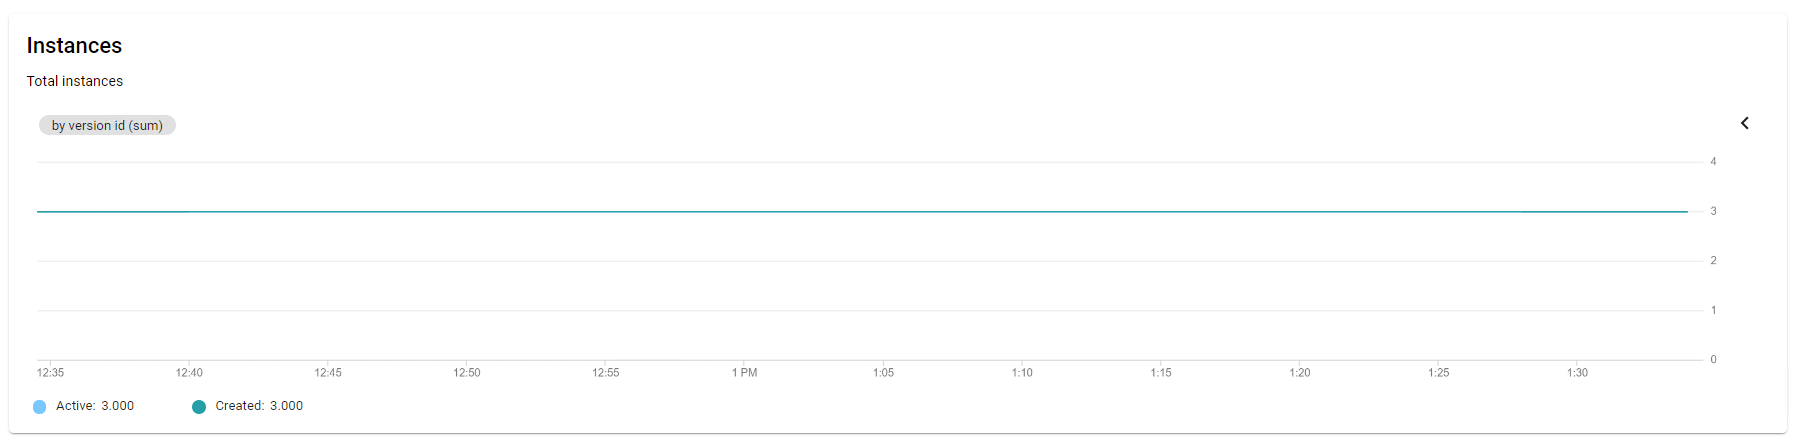

In [37]:
import time
import os                                                                       
import threading

def num_of_requests_processed_within_a_period(secs):
    num = 0
    stop_time = time.time() + secs
    while time.time() < stop_time:
        output = subprocess.check_output("gcloud auth print-identity-token", shell=True, text=True)
        access_token = "Bearer " + output[:-1]
        headers = {'Authorization': access_token}
        response = requests.post(gae_t5_base, 
                                 headers=headers, 
                                 json=data_t5_base)
        print(response.text)
        num += 1
    return num

In [38]:
import concurrent.futures
ls_num_threads = list(range(1, 5))
tot_num_requests_processed = []
num_secs = 20
print('The throughput is tested within a duration of {}s'.format(str(num_secs)))

for num_threads in ls_num_threads:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(num_of_requests_processed_within_a_period, num_secs) for param in [num_secs]*num_threads]
        results = [f.result() for f in futures]
        tot_req = sum(results)
        tot_num_requests_processed.append(tot_req)
        print('num_threads is: {};'.format(str(num_threads)), 
              'tot number of requests processed in {}s are {}'.format(str(num_secs), 
                                                                      str(tot_req)))

The throughput is tested within a duration of 20s
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 1; tot number of requests processed in 20s are 1
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
num_threads is: 2; tot number of requests processed in 20s are 2
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new guidelines to reopen the country would be announced on tuesday.
}
{ output:<pad> the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths. the president said new g